In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas import json_normalize


from adjustText import adjust_text
from matplotlib import cm
import matplotlib.patheffects as path_effects


%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
with open(r"Fulham_Arsenal.json") as f:
    md = json.load(f)

In [49]:
df = json_normalize(md["events"], sep="_")

In [50]:
df['type_displayName'].value_counts()

Pass               1226
BallRecovery         88
Foul                 48
BallTouch            44
Interception         28
Aerial               26
Tackle               23
Clearance            22
TakeOn               22
Dispossessed         14
Challenge            12
CornerAwarded        10
Save                  9
BlockedPass           9
SavedShot             9
KeeperPickup          7
SubstitutionOn        6
End                   6
SubstitutionOff       6
MissedShots           5
OffsideGiven          4
Card                  4
OffsideProvoked       4
OffsidePass           4
Start                 4
Goal                  3
FormationSet          2
KeeperSweeper         1
ShotOnPost            1
Error                 1
Name: type_displayName, dtype: int64

In [51]:
def get_defensive_actions(df):
    """ Get all defensive actions"""

    df = df.query("(type_displayName == 'BallRecovery') | (type_displayName == 'Interception')| (type_displayName == 'Tackle') | (type_displayName == 'Clearance') | (type_displayName == 'Challenge')").reset_index(drop=True)
    df.dropna(subset=["playerId", "teamId"], inplace=True)
    df[["playerId", "teamId"]] = df[["playerId", "teamId"]].astype(int)
    return df

In [52]:
# mask = (df.teamId == 13)
# df.loc[mask].head()

In [53]:
pdf = get_defensive_actions(df)

In [54]:
pdf['type_displayName'].value_counts()

BallRecovery    88
Interception    28
Tackle          23
Clearance       22
Challenge       12
Name: type_displayName, dtype: int64

In [70]:
pdf.head()

,eventId,expandedMinute,id,isTouch,minute,qualifiers,satisfiedEventsTypes,second,teamId,x,y,outcomeType_displayName,outcomeType_value,period_displayName,period_value,type_displayName,type_value,endX,endY,playerId,blockedX,blockedY,goalMouthY,goalMouthZ,isShot,relatedEventId,relatedPlayerId,isGoal,cardType_displayName,cardType_value,$idx,$len,field,satisfiers,text,minuteInfo_expandedMinute,minuteInfo_extraTime,minuteInfo_isEndOfPeriod,minuteInfo_minute,minuteInfo_minuteString,minuteInfo_period,type_$idx,type_$len
0,9,0,2210244245,True,0,"[{'type': {'displayName': 'Zone', 'value': 56}...","[90, 100, 55]",31.0,170,62.9,4.7,Successful,1,FirstHalf,1,Interception,8,NaN,NaN,68335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,0,2210244269,False,0,[],[92],36.0,170,23.9,19.7,Successful,1,FirstHalf,1,BallRecovery,49,NaN,NaN,85006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,0,2210244329,False,0,[],[92],46.0,13,46.3,38.2,Successful,1,FirstHalf,1,BallRecovery,49,NaN,NaN,125209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,1,2210244489,False,1,[],[92],16.0,13,54.6,29.5,Successful,1,FirstHalf,1,BallRecovery,49,NaN,NaN,89401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,1,2210244593,True,1,[{'type': {'displayName': 'OppositeRelatedEven...,"[90, 141]",36.0,13,13.0,62.8,Unsuccessful,0,FirstHalf,1,Tackle,7,NaN,NaN,92173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
mask_defensive = (pdf.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df = df.loc[mask_chelsea_pressure, ['x', 'y']]

KeyError: 'x'

In [58]:
#preferred alternative to multiple OR conditions:
mask = (pdf.teamId == 13)
ars = pdf.loc[mask]

In [59]:
#preferred alternative to multiple OR conditions:
mask = (pdf.teamId == 170)
ful = pdf.loc[mask]

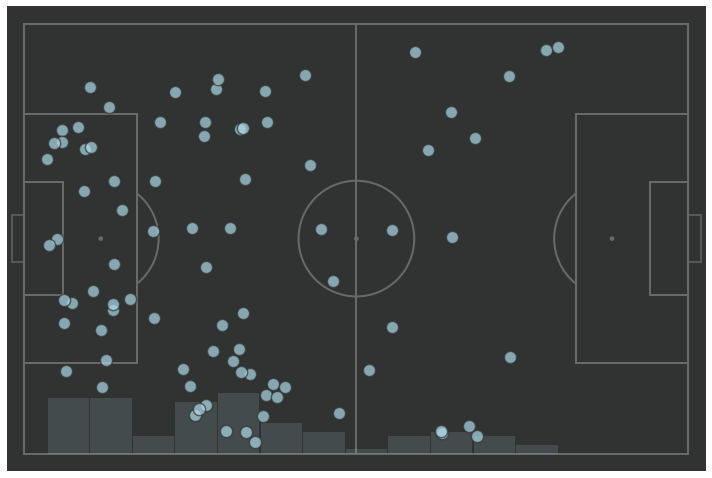

In [64]:
# team = "Arsenal"
# oppo1 = "Liverpool"
# oppo2 = "Fulham"
# background = "#313332"
# line = '#696969'
# title_font = "BBC Reith Sans"
# body_font = "BBC Reith Sans"
# text_color = "w"
# primary = "red"

pitch = Pitch(figsize=(10,10),orientation='horizontal',view='full',goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()
plt.scatter(ful['x'],ful['y'],color='lightblue', s=150, zorder=12,alpha=0.7, ec=background,lw=1.5)

x = ful['x']
plt.hist(x, bins = 12,rwidth=0.97, color='lightblue',alpha=0.15)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("ful def actions",bbox_inches="tight",dpi=200);

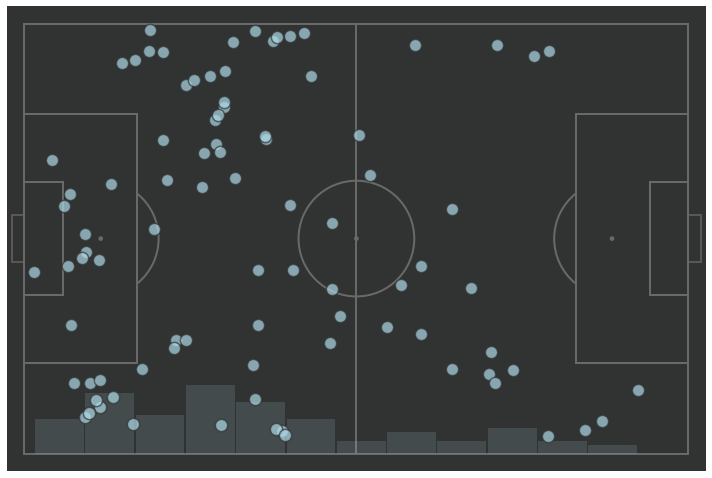

In [68]:
# team = "Arsenal"
# oppo1 = "Liverpool"
# oppo2 = "Fulham"
# background = "#313332"
# line = '#696969'
# title_font = "BBC Reith Sans"
# body_font = "BBC Reith Sans"
# text_color = "w"
# primary = "red"

pitch = Pitch(figsize=(10,10),orientation='horizontal',view='full',goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()
plt.scatter(ars['x'],ars['y'],color='lightblue', s=150, zorder=12,alpha=0.7, ec=background,lw=1.5)

x = ars['x']
plt.hist(x, bins = 12,rwidth=0.97, color='lightblue',alpha=0.15)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("ars def actions",bbox_inches="tight",dpi=200);

In [90]:
# beeswarm(x, orientation="horizontal",bins=100,rounding=2,marker=2,lw=1,s=30,)